<a href="https://colab.research.google.com/github/Ravi7090/AI_DATA_ANALYSIS_/blob/main/Anomaly%20Detection%20in%20finicial%20transaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

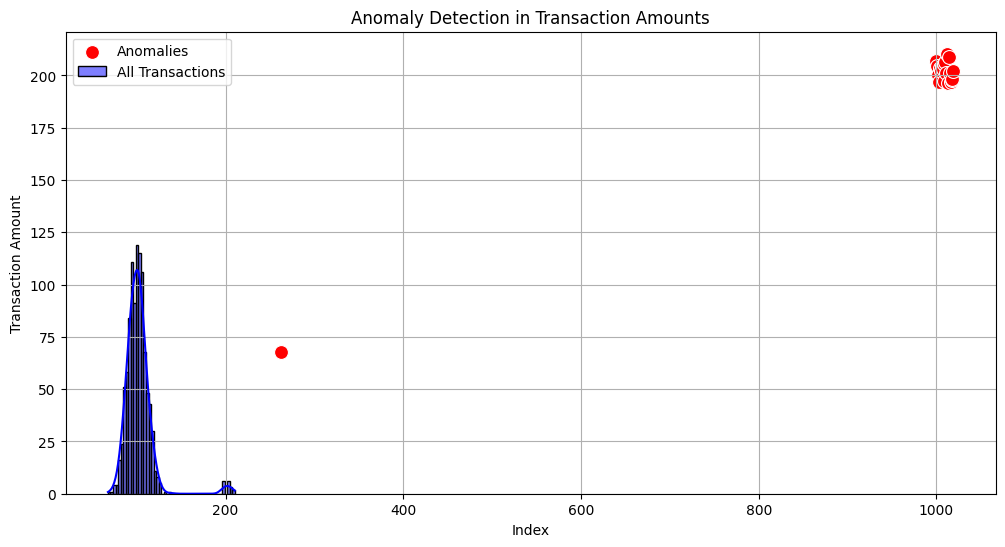

Detected Anomalies:
      transaction_amount  anomaly_score  is_anomaly
262            67.587327             -1           1
1000          206.996777             -1           1
1001          204.623168             -1           1
1002          200.298152             -1           1
1003          196.765316             -1           1
1004          203.491117             -1           1
1005          201.967427             -1           1
1006          204.475966             -1           1
1007          203.175859             -1           1
1008          205.247764             -1           1
1009          197.323824             -1           1
1010          206.586970             -1           1
1011          200.987998             -1           1
1012          210.376304             -1           1
1013          196.554061             -1           1
1014          208.679819             -1           1
1015          200.989554             -1           1
1016          196.742910             -1     

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Load sample financial transactions dataset (simulate if not available)
# For demo purposes, let's create synthetic data
np.random.seed(42)
data_normal = np.random.normal(loc=100, scale=10, size=(1000, 1))  # normal transactions
data_anomaly = np.random.normal(loc=200, scale=5, size=(20, 1))    # anomalous transactions
data = np.vstack((data_normal, data_anomaly))

# Create DataFrame
df = pd.DataFrame(data, columns=['transaction_amount'])

# Initialize Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(df[['transaction_amount']])

# Label: -1 = anomaly, 1 = normal
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

# Visualize anomalies
plt.figure(figsize=(12, 6))
sns.histplot(df['transaction_amount'], bins=50, kde=True, color='blue', label='All Transactions')
sns.scatterplot(x=df[df['is_anomaly'] == 1].index,
                y=df[df['is_anomaly'] == 1]['transaction_amount'],
                color='red', label='Anomalies', s=100)
plt.legend()
plt.title("Anomaly Detection in Transaction Amounts")
plt.xlabel("Index")
plt.ylabel("Transaction Amount")
plt.grid(True)
plt.show()

# Show anomalies
print("Detected Anomalies:")
print(df[df['is_anomaly'] == 1])


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


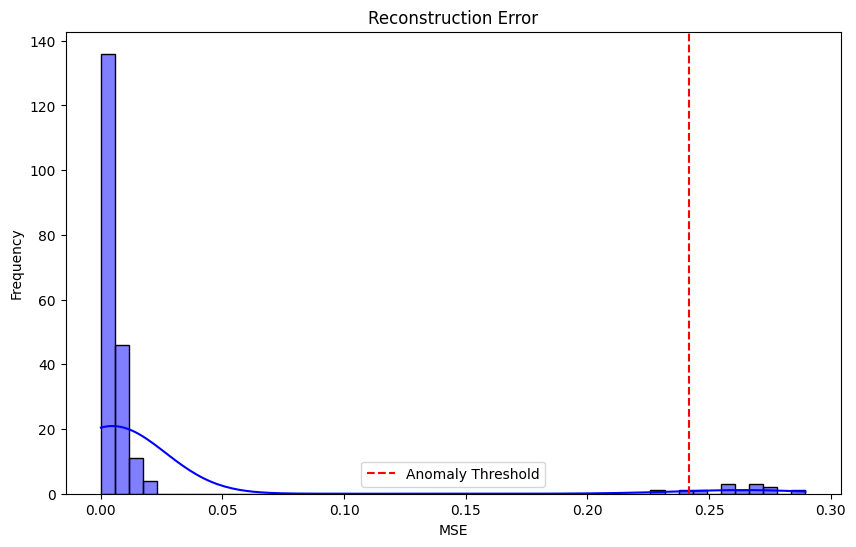

Detected anomalies:
      amount  time_gap  location_score
0   0.939307  1.000000        0.912206
1   0.947587  0.958676        0.913122
2   0.915054  0.938626        0.986420
3   0.939381  0.899197        0.924366
4   0.915341  0.927323        0.980224
5   0.925328  0.952983        0.936590
6   0.949071  0.932437        0.969153
7   0.904803  0.979258        0.998302
8   0.948198  0.923823        0.939871
9   0.943453  0.930117        0.935263
10  1.000000  0.961753        0.890489


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers

# Step 1: Generate synthetic financial data
np.random.seed(42)
normal_data = np.random.normal(loc=100, scale=10, size=(1000, 3))  # Normal transactions
anomalous_data = np.random.normal(loc=200, scale=5, size=(50, 3))   # Anomalies
data = np.vstack((normal_data, anomalous_data))
columns = ['amount', 'time_gap', 'location_score']
df = pd.DataFrame(data, columns=columns)

# Step 2: Preprocess data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# Step 3: Split data
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

# Step 4: Define autoencoder model
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(4, activation='relu')(input_layer)
encoded = Dense(2, activation='relu')(encoded)
decoded = Dense(4, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(inputs=input_layer, outputs=decoded)

autoencoder.compile(optimizer='adam', loss='mse')

# Step 5: Train the model
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=0)

# Step 6: Predict and calculate reconstruction error
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

# Step 7: Set threshold and detect anomalies
threshold = np.percentile(mse, 95)
anomalies = mse > threshold

# Step 8: Visualize results
plt.figure(figsize=(10, 6))
sns.histplot(mse, bins=50, kde=True, color='blue')
plt.axvline(threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.title("Reconstruction Error")
plt.xlabel("MSE")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Step 9: Show detected anomalies
print("Detected anomalies:")
print(pd.DataFrame(X_test[anomalies], columns=columns))


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0848 - val_loss: 0.0827
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0823 - val_loss: 0.0778
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0765 - val_loss: 0.0725
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0706 - val_loss: 0.0667
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0612 - val_loss: 0.0592
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0540 - val_loss: 0.0516
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0436 - val_loss: 0.0459
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0376 - val_loss: 0.0417
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0307 - val_loss: 0.0383
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0308 - val_loss: 0.0353
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0293 - val_loss: 0.0326
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0259 - val_l

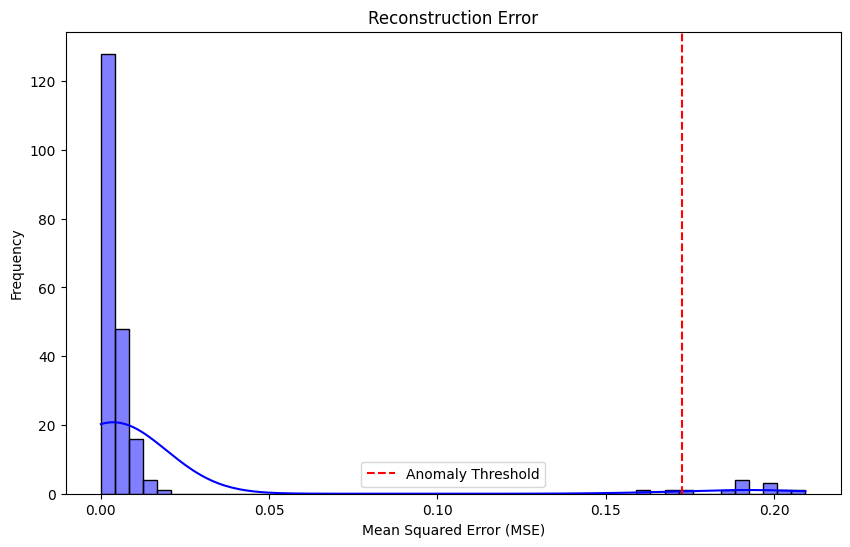

Detected Anomalies:
        amount    time_gap  location_score
0   201.011644  208.159284      196.334835
1   202.161315  202.350221      196.461871
2   197.644377  199.531819      206.628983
3   201.021945  193.989252      198.021596
4   197.684193  197.942867      205.769504
5   199.070771  201.549995      199.717058
6   202.367359  198.661795      204.233854
7   196.221042  205.243536      208.277036
8   202.246094  197.450967      200.172205
9   201.587266  198.335698      199.533066
10  209.438438  202.782766      193.322592


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Step 1: Generate synthetic financial transaction data
np.random.seed(42)
normal_data = np.random.normal(loc=100, scale=10, size=(1000, 3))   # Normal transactions
anomalous_data = np.random.normal(loc=200, scale=5, size=(50, 3))   # Anomalous transactions
data = np.vstack((normal_data, anomalous_data))
columns = ['amount', 'time_gap', 'location_score']
df = pd.DataFrame(data, columns=columns)

# Step 2: Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# Step 3: Split into training and testing sets
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

# Step 4: Define the Autoencoder
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(4, activation='relu')(input_layer)
encoded = Dense(2, activation='relu')(encoded)
decoded = Dense(4, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Step 5: Train the model
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, X_test),
                verbose=1)

# Step 6: Predict and calculate reconstruction error
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

# Step 7: Detect anomalies based on threshold
threshold = np.percentile(mse, 95)  # Top 5% as anomalies
anomalies = mse > threshold

# Step 8: Visualize the results
plt.figure(figsize=(10, 6))
sns.histplot(mse, bins=50, kde=True, color='blue')
plt.axvline(threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.title("Reconstruction Error")
plt.xlabel("Mean Squared Error (MSE)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Step 9: Show detected anomalies
print("Detected Anomalies:")
anomaly_df = pd.DataFrame(scaler.inverse_transform(X_test[anomalies]), columns=columns)
print(anomaly_df)


Confusion Matrix:
[[  0 999   1]
 [  0   0   0]
 [  0   0  20]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1000
           0       0.00      0.00      0.00         0
           1       0.95      1.00      0.98        20

    accuracy                           0.02      1020
   macro avg       0.32      0.33      0.33      1020
weighted avg       0.02      0.02      0.02      1020



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

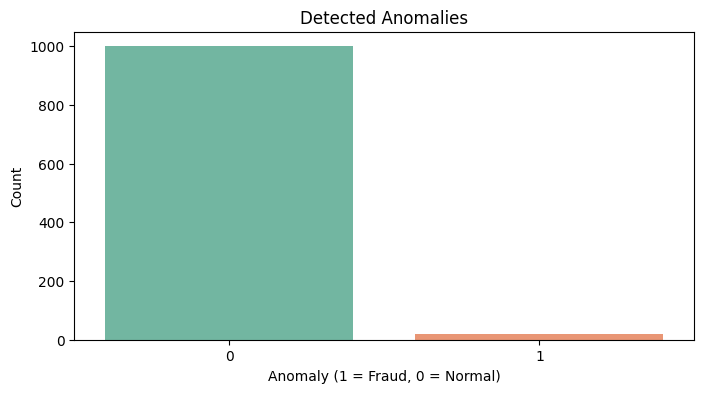

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate synthetic transaction data
np.random.seed(42)

# Create 1000 normal transactions
normal_data = {
    'amount': np.random.normal(loc=50, scale=10, size=1000),
    'transaction_time': np.random.normal(loc=100000, scale=20000, size=1000)
}

# Create 20 fraudulent transactions
fraud_data = {
    'amount': np.random.normal(loc=300, scale=50, size=20),
    'transaction_time': np.random.normal(loc=300000, scale=30000, size=20)
}

# Create DataFrames
df_normal = pd.DataFrame(normal_data)
df_fraud = pd.DataFrame(fraud_data)

# Label them
df_normal['label'] = -1
df_fraud['label'] = 1

# Combine the data
df = pd.concat([df_normal, df_fraud], ignore_index=True)

# Step 2: Feature scaling (optional for some models, recommended for better performance)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['amount_scaled', 'time_scaled']] = scaler.fit_transform(df[['amount', 'transaction_time']])

# Step 3: Apply Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
df['anomaly'] = iso_forest.fit_predict(df[['amount_scaled', 'time_scaled']])

# Step 4: Convert output: -1 = anomaly, 1 = normal
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

# Step 5: Evaluate model
print("Confusion Matrix:")
print(confusion_matrix(df['label'], df['anomaly']))
print("\nClassification Report:")
print(classification_report(df['label'], df['anomaly']))

# Step 6: Visualize
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='anomaly', palette='Set2')
plt.title("Detected Anomalies")
plt.xlabel("Anomaly (1 = Fraud, 0 = Normal)")
plt.ylabel("Count")
plt.show()


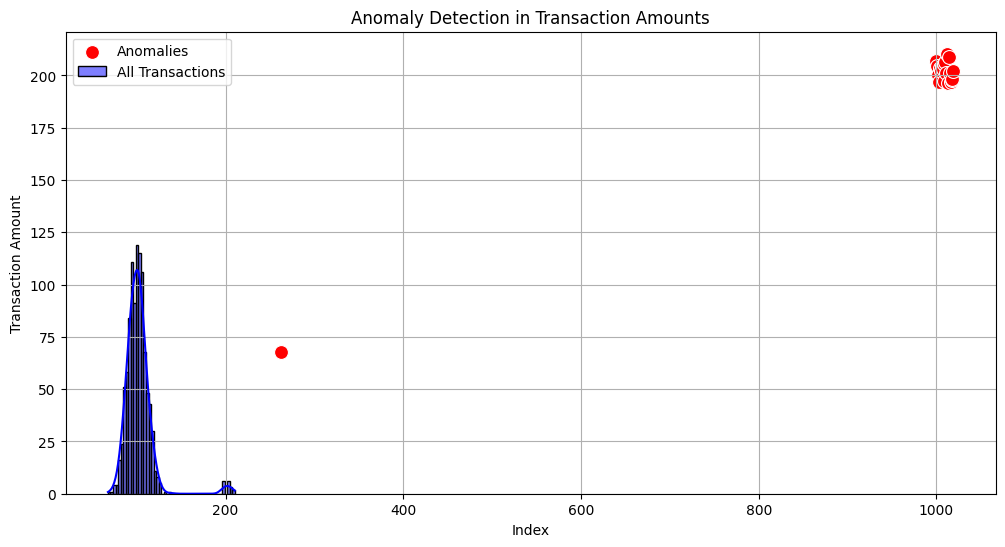

Detected Anomalies:
      transaction_amount  anomaly_score  is_anomaly
262            67.587327             -1           1
1000          206.996777             -1           1
1001          204.623168             -1           1
1002          200.298152             -1           1
1003          196.765316             -1           1
1004          203.491117             -1           1
1005          201.967427             -1           1
1006          204.475966             -1           1
1007          203.175859             -1           1
1008          205.247764             -1           1
1009          197.323824             -1           1
1010          206.586970             -1           1
1011          200.987998             -1           1
1012          210.376304             -1           1
1013          196.554061             -1           1
1014          208.679819             -1           1
1015          200.989554             -1           1
1016          196.742910             -1     

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate synthetic data
np.random.seed(42)
data_normal = np.random.normal(loc=100, scale=10, size=(1000, 1))  # Normal transactions
data_anomaly = np.random.normal(loc=200, scale=5, size=(20, 1))    # Anomalous transactions
data = np.vstack((data_normal, data_anomaly))

# Step 2: Create a DataFrame
df = pd.DataFrame(data, columns=['transaction_amount'])

# Step 3: Apply Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(df[['transaction_amount']])

# Step 4: Convert to binary anomaly labels (1 = anomaly, 0 = normal)
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

# Step 5: Visualize anomalies
plt.figure(figsize=(12, 6))
sns.histplot(df['transaction_amount'], bins=50, kde=True, color='blue', label='All Transactions')

# Highlight anomalies on the same plot
sns.scatterplot(x=df[df['is_anomaly'] == 1].index,
                y=df[df['is_anomaly'] == 1]['transaction_amount'],
                color='red', label='Anomalies', s=100)

plt.legend()
plt.title("Anomaly Detection in Transaction Amounts")
plt.xlabel("Index")
plt.ylabel("Transaction Amount")
plt.grid(True)
plt.show()

# Step 6: Print detected anomalies
print("Detected Anomalies:")
print(df[df['is_anomaly'] == 1])
